# Main idea of word2vec

## Two algorithms
1. Skip-grams: predict context words given target(position independent)
2. Continuous Bag of words (CBOW): Predict target word from bag-of-words context

## Two (moderately efficient) training methods

1. Hierarchical softmax
2. Negative sampling


Word2Vec is the name given to a class of neural network models that, given an unlabelled training corpus, produce a vector for each word in the corpus that encodes its semantic information.

1. We can measure the semantic similarity between two words are by calculating the cosine similarity between their corresponding word vectors.

2.  The semantic information that is contained in these vectors make them powerful features, We can use these word vectors as features for various supervised NLP tasks.


## One-hot vector

The one-hot vector method represent every word as an $R^{|v| \times 1}$ vectore with all 0s and one 1 at the index of that word in the sorted english language, In this notion, $|V|$ is the size of our vocabulary.

This word representation does not give us directly any notion of similarity, because each word vector is orthogonal to other vectors.

## Iteration Based Methods - Word2Vec

Iteration-based methods capture coocurrence of words one at a time instead of capturing all co-occurence counts directly like in SVD methods.

### Language Models

Let'start with an example: "The cat jumped over the puddle."

The probability on any given sequence of $n$ words:

$$
P(w_1, w_2, ..., w_n) = \Pi^n_{i=1}P(w_i)
$$

This is called **unigram model** which is a bit ludicrous. Because we know the next word is highly contingent upon the previous sequence of words.

Perhap we let the probability of the sequence depend on the pairwise probability of a word in the sequence and the word next to it. This is called **bigram model**:

$$
P(w_1, w_2, ..., w_n) = \Pi^n_{i=2}P(w_i|w_{i-1})
$$

But this is certainly a bit naive since we are only concerning with pairs of neighboring words rather than evaluating a whole sentence.

## Continuous Bag of Words Model (CBOW)

CBOW predicting a center word from the surrounding given context.

For each word, we want to learn 2 vectors:
- v: (input vector) when the word is given in the context.
- u: (output vector) when the word is in the center which want to be predicted.

### Detail

1. Set up known parameters. the known paramters in model be the sentence represented by one-hot word vectors.
    * The input one-hot vector or context will be represented with an $x^(c)$. 
    * The output as $y^(c)$. In the CBOW model, since we only have one output, so we just call this $y$ which is the one-hot vector of the known center word.
2. Define unknowns in the model.
    * $V \in R^{n \times |v|}$ is the input word matrix such that the $i$-th column of $V$ is the n-dimensional embedded vector for word $w_i$ when it is an input to this model, denote this $n \times 1$ vector as $v_i$.
    * $U \in R^{|v| \times n}$ is the output word matrix. The $j$-th row of $U$ is an n-dimensional embedded vector for word $w_j$ when it is an output of the model, denote this row of $U$ as $u_j$.
    
For $n$ is an arbitrary size which define the size of embedding space.

**Note that we do in fact learn two vectors for every word $w_j$**

**Breakdown the way this model works in these steps:**

1. Generate one-hot vectors for the input context of size $m: (x^{(c-m)}, ..., x^{(c-1)}, x^{(c+1)}, ..., x^{(c+m)} \in R^{|V|})$

2. Get embedded word vectors for the context $(v_{c-m} = Vx^{(c-m)}, ..., v_{c+m} = Vx^{(c+m)} \in R^n)$

3. Average these vectors to get $\hat v = \frac{v_{c-m} + v_{c-m+1} + ... + v_{c+m}}{2m} \in R^n$

4. Generate a score vector $z = U\hat v \in R^{|V|}$. **As the dot product of similar vectors is higher, it will push similar words close to each other in order to achieve a high score.**

5. Turn the score into probabilities $\hat y = softmax(z) \in R^{|V|}$.

6. We desire our probabilites generated, $\hat y \in R^{|V|}$ to match the true probabilites $y \in R^{|V|}$, which also happens to be the one-hot vector of the actual word.

## Loss function - cross entropy $H(\hat y, y)$

$$
H(\hat y, y) = - \Sigma_{j=1}^{|V|}y_j\log (\hat y_j)
$$

For this formulation. If $H = 0$ means there is no penalty or loss, vice versa.

For the equation below,

$$
\begin{eqnarray}
minimize J & = & -\log P(w_c|w_{c-m}, ..., w_{c-1}, w_{c+1}, ..., w_{c+m})\\
& = & -\log P(u_c|\hat v)\\
& = & -\log \frac{\exp (u^T_c\hat v)}{\Sigma_{j=1}^{|V|}\exp (u_j^T\hat v)}\\
& = & -u_c^T\hat v + \log \Sigma_{j=1}^{|V|}\exp(u_j^T\hat v)\\
\end{eqnarray}
$$

Then use stochastic gradient descent to update all relevant word vectors $u_c$ and $v_j$.

$$
U_{new} = U_{old} - \alpha\nabla uJ\\
V_{new} = V_{old} - \alpha\nabla vJ
$$

# Skip-Gram Model


Skip-gram model is a simple neural network with one hidden layer.

The input of the skip-gram is a single word $w_i$ and the output is the words in $w_i$'s context $w_{o1},...w_{oc}$ defined by a word window of size $C$.

For each word $t = 1...T$, predict surrounding words in a windows of "Radius" $m$ of every word.

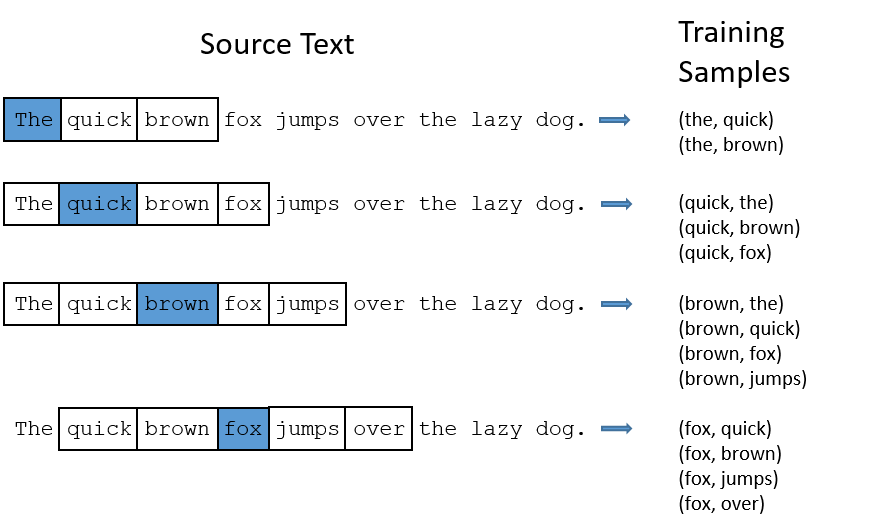

Objective function: Maximize the probability of any context word given the current center word:

$$
J'(\theta) = \Pi_{t=1}^{T}\Pi_{j\neq0,-m\le j \le m} p(W_{t+j}|W_t;\theta)
$$

We could take the nagative log likelihood of the equation above,

$$
J(\theta) = -\frac{1}{T}\Sigma_{t=1}^T\Sigma_{j\neq0, -m\le j \le m}\log p(W_{t+j}|W_t)
$$

Where $\theta$ represents all variables will be optimized.


The input of skip-gram model is only a one-hot vector which represent the given center word, denote by $x$.

The output is context words represented by word vectors and denote as $y^i$.

Breakdown the way this model works in these 6 steps:

1. Generate one-hot input vector $x \in R^{|V|} of the center word.

2. Get embedded word vector for the center word $v_c = Vx \in R^n$

3. Generate a score vector $z = Uv_c$

4. Turn the score vector into probabilites, $\hat y = softmax(z)$. Note that $ \hat y_{c-m}, ..., \hat y_{c-1}, \hat y_{c+1}, ... , \hat y_{c+m}$ are the probabilities of observing each context word.

5. We desire probability vector generated to match the true probabilities which is $y^{(c-m)}, ..., y^{(c-1)}, y^{(c+1)}, ..., y^{(c+m)}$, the one-hot vectors of the actual output.

For this model, we invoke a Naive Bayes assumption to break out the probabilities(conditional independence). **Given the center word, all output words are completely independent**

$$
\begin{eqnarray}
minimize J & = &  -\log P(w_{c-m}, ..., w_{c-1}, ..., w_{c+1}, ..., w_{c+m}|w_c) \\ 
& = & -\log\Pi_{j=0,j\neq m}^{2m}P(w_{c-m+j}|w_c)\\
& = & -\log\Pi_{j=0,j\neq m}^{2m}P(u_{c-m+j}|v_c)\\
& = & -\log\Pi_{j=0,j\neq m}^{2m}\frac{\exp(u^T_{c-m+j}v_c)}{\Sigma_{k=1}^{|V|}exp(u_k^Tv_c)}\\
& = & -\Pi_{j=0,j\neq m}^{2m}u^T_{c-m+j}v_c + 2m\log\Sigma_{k=1}^{|V|}\exp(u_k^Tv_c)
\end{eqnarray}
$$

With this objective function, we can compute the gradient with respect to the unknown parameters and at each iteration update them via SGD.

Note that

$$
\begin{eqnarray}
J & = &-\Sigma_{j=0,j\neq m}^{2m}\log P(u_{c-m+j}|v_c)\\
& = & \Sigma_{j=0,j\neq m}^{2m}H(\hat y, y_{c-m+j})
\end{eqnarray}
$$

Where $H(\hat y, y_{c-m+j})$ is the cross-entropy between the probability vector $\hat y$ and the one-hot vector $y_{c-m+j}$

## Forward Propagation

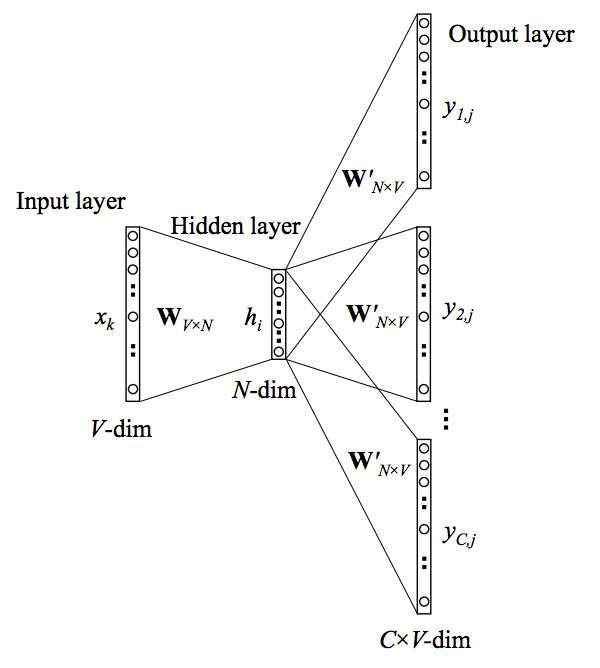

In the above model $x$ represents the one-hot encoded vector corresponding to the input word in the training instance, and $\{y_1,...y_c\}$ are the one-hot encoded vectors corresponding to the output words in the training instance.

**The $V \times N$ matrix $W$ is the weight matrix between the input layer and hidden layer, whose $i^{th}$ row represents the weights corresponding to the $i^{th}$ word in the vocabulary. This weight matrix $W$ is what we are interested in learning, because it contains the vector encodings of all of the words in vocabulary. Each output word vector also has an associated $N \times V$ output matrix $W'$, there is also a hidden layer consisting of $N$ nodes (the exact size of $N$ is a training parameter).**

## Model Details

Suppose we have a vocabulary of 10000 **unique words**.

First of all, we can't feed a word just as a text string to a network, so we need a way to represent the words to the network. ** we're going to represent an input word as a one-hot vector.**

The output of the network is a single vector(also with 10000 components) containing, for every word in vocabulary, the probability that a randomly selected nearby word is that vocabulary word.

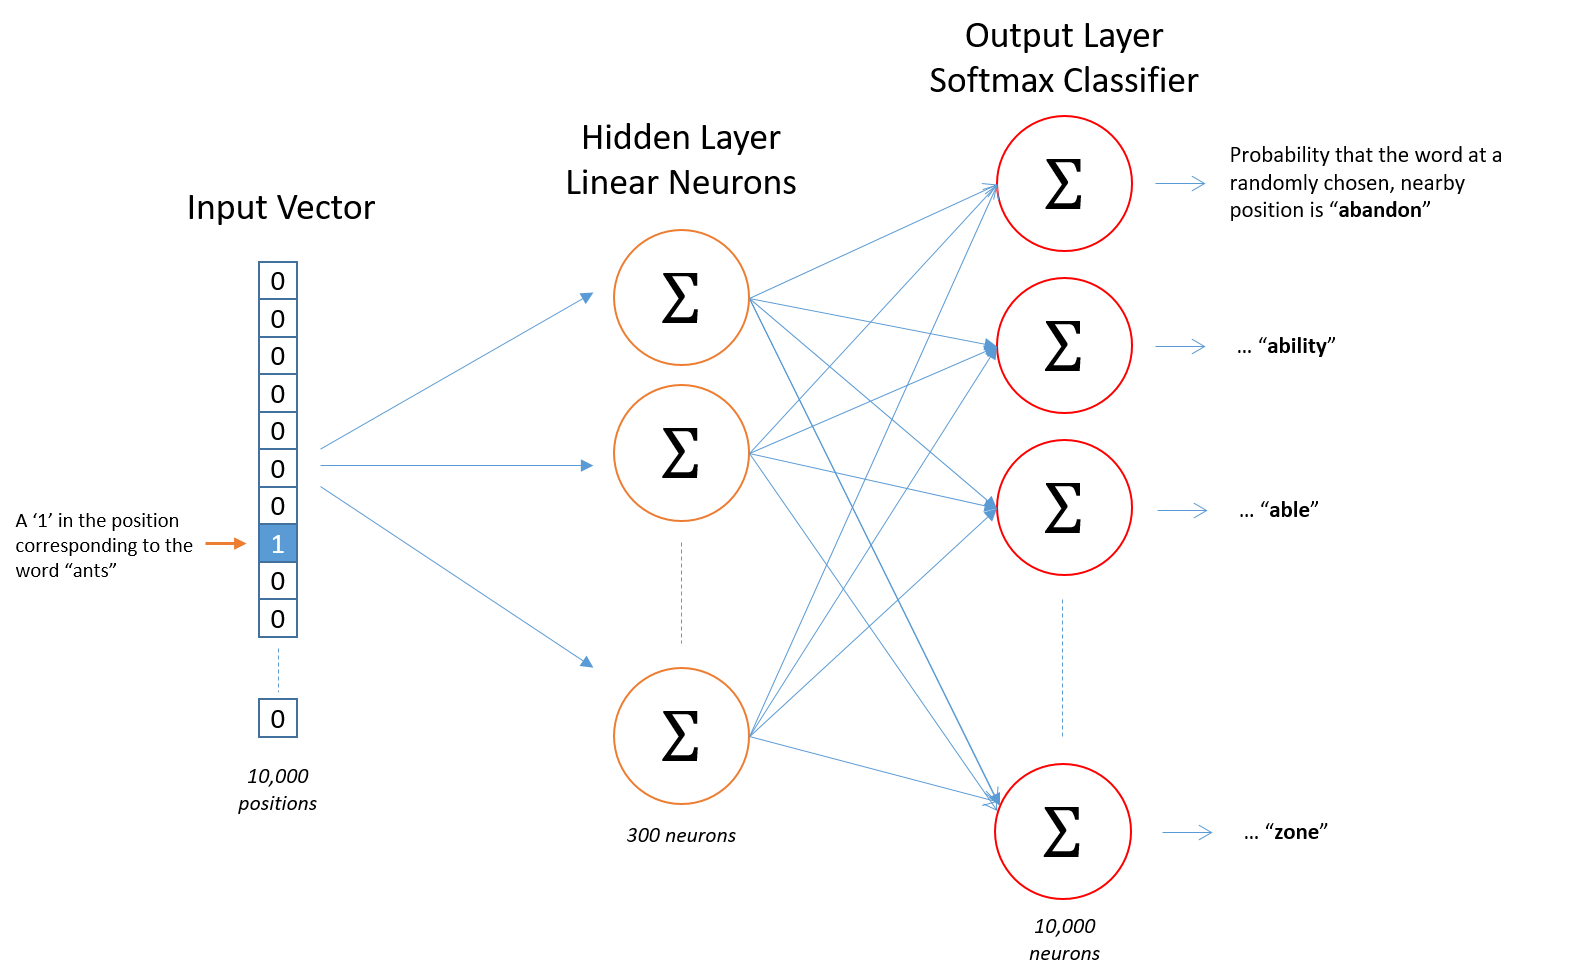

There is no activation function on the hidden layer neurons, but the output neurons use softmax.

**When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when evaluate the trained network on an input word, the output vector will actually be a probability distribution.**

## The Hidden Layer

If we're going to learn word vectors with $n$ features, So the hidden layer is going to be represented by a weight matrix with $m$ rows (m is the size of unique words in vocabulary, one for every word in it) and $n$ columns(one for every hidden neuron).

The choice of $n$ is a hyper-parameter need to be tuned in the application which would yields the best results.

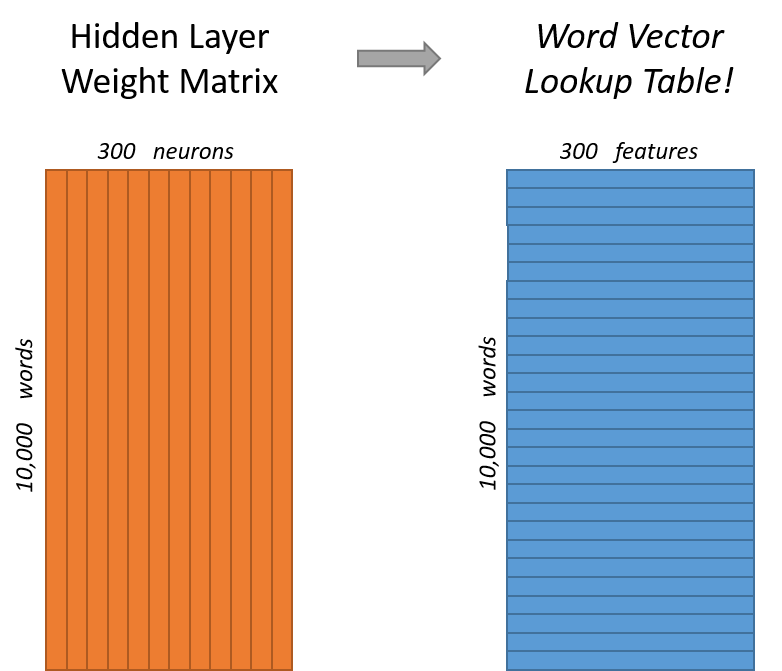

## What' the effect of one-hot vectors.

As shown in the picture, it will effectively select the matrix row corresponding to the "1".

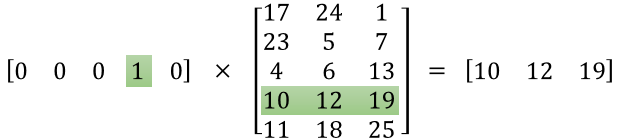

**This means that the hidden layer of the model is really just operating as a lookup table. The output of the hidden layer is the "word vector" for the input word.**

For the input $x$ with $x_k = 1$ and $x_{k'} = 0$ for all $k' \neq k$ the outputs of the hidden layer will be equivalent to the $k^{th}$ row of $W$.

$$
h = x^TW = W_{(k,)} = v_{w_i}
$$

## The Output Layer

The selected word vector for a certain word then get fed to the output layer. The output layer is a softmax regression classifier.

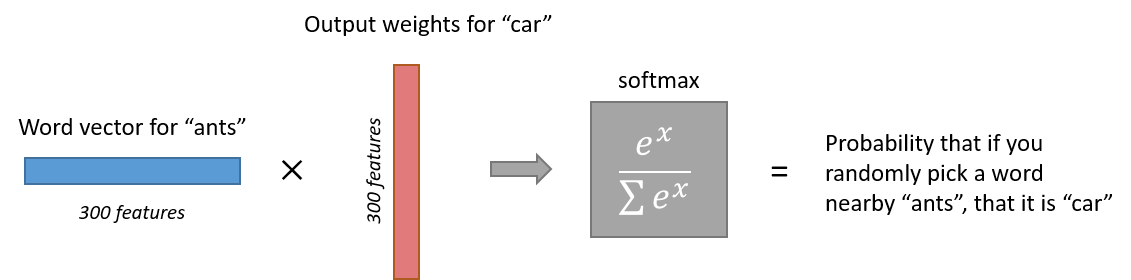

## Intuition

If two different words have very similar "contexts", then the model need to output very similar results for these two words.